In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# CE vs SGN

In [86]:
from cifar10.sgn_norm_nonoise import sgn_test_acc_noise_0, sgn_test_loss_noise_0, sgn_train_acc_noise_0, sgn_train_loss_noise_0
from cifar10.sgn_norm_symmetric import (
        sgn_test_acc_noise_20, sgn_test_loss_noise_20, sgn_train_acc_noise_20, sgn_train_loss_noise_20,
        sgn_test_acc_noise_40, sgn_test_loss_noise_40, sgn_train_acc_noise_40, sgn_train_loss_noise_40
)
from cifar10.sgn_norm_asymmetric import (
    sgn_test_acc_asymmetric_20, sgn_test_loss_asymmetric_20, sgn_train_acc_asymmetric_20, sgn_train_loss_asymmetric_20,
    sgn_test_acc_asymmetric_40, sgn_test_loss_asymmetric_40, sgn_train_acc_asymmetric_40, sgn_train_loss_asymmetric_40
)

from cifar10.ce_norm_nonoise import ce_test_acc_noise_0, ce_test_loss_noise_0, ce_train_acc_noise_0, ce_train_loss_noise_0
from cifar10.ce_norm_symmetric import (
    ce_test_acc_noise_20, ce_test_loss_noise_20, ce_train_acc_noise_20, ce_train_loss_noise_20,
    ce_test_acc_noise_40, ce_test_loss_noise_40, ce_train_acc_noise_40, ce_train_loss_noise_40,
    ce_test_acc_noise_60, ce_test_loss_noise_60, ce_train_acc_noise_60, ce_train_loss_noise_60
)
from cifar10.ce_norm_asymmetric import (
    ce_test_acc_asymmetric_20, ce_test_loss_asymmetric_20, ce_train_acc_asymmetric_20, ce_train_loss_asymmetric_20,
    ce_test_acc_asymmetric_40, ce_test_loss_asymmetric_40, ce_train_acc_asymmetric_40, ce_train_loss_asymmetric_40
)

In [87]:
def plot_accuracy(acc_sgn_test, acc_ce_test, acc_sgn_train, acc_ce_train, noise_type=None, noise_rate=0.0):
    import matplotlib.pyplot as plt
    import numpy as np

    # Convert inputs to numpy arrays
    acc_sgn_test = np.array(acc_sgn_test)
    acc_ce_test = np.array(acc_ce_test)
    acc_sgn_train = np.array(acc_sgn_train)
    acc_ce_train = np.array(acc_ce_train)

    # Ensure lengths match
    assert len(acc_ce_test) == len(acc_sgn_test), "Test accuracies not the same length."
    assert len(acc_ce_train) == len(acc_sgn_train), "Train accuracies not the same length."

    # Generate epochs
    epochs = [i + 1 for i in range(len(acc_sgn_test))]

    # Create subplots
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

    # Left subplot: Test accuracy
    y_min_test = min(acc_sgn_test.min(), acc_ce_test.min())

    ax1 = ax[0]

    ax1.plot(epochs, acc_sgn_test, 'b-', label='SGN (Test)')
    ax1.plot(epochs, acc_ce_test, 'r--', label='CE (Test)')

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(y_min_test, 100)

    ax1.legend(loc="upper left")
    ax1.set_title("Test Accuracy")

    # Right subplot: Train accuracy
    y_min_train = min(acc_sgn_train.min(), acc_ce_train.min())

    ax2 = ax[1]

    ax2.plot(epochs, acc_sgn_train, 'b-', label='SGN (Train)')
    ax2.plot(epochs, acc_ce_train, 'r--', label='CE (Train)')

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_ylim(y_min_train, 100)

    ax2.legend(loc="upper left")
    ax2.set_title("Train Accuracy")

    # Set overall title
    if noise_type is None or noise_rate == 0:
        fig.suptitle("SGN vs CE Accuracy by Epoch\n\nNo Noise", fontsize=14)
    else:
        fig.suptitle(f"SGN vs CE Accuracy by Epoch\n\nNoise type: {noise_type}, noise rate: {round(noise_rate*100, 2)}%", fontsize=14)
    
    # Adjust layout and display
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## No Noise

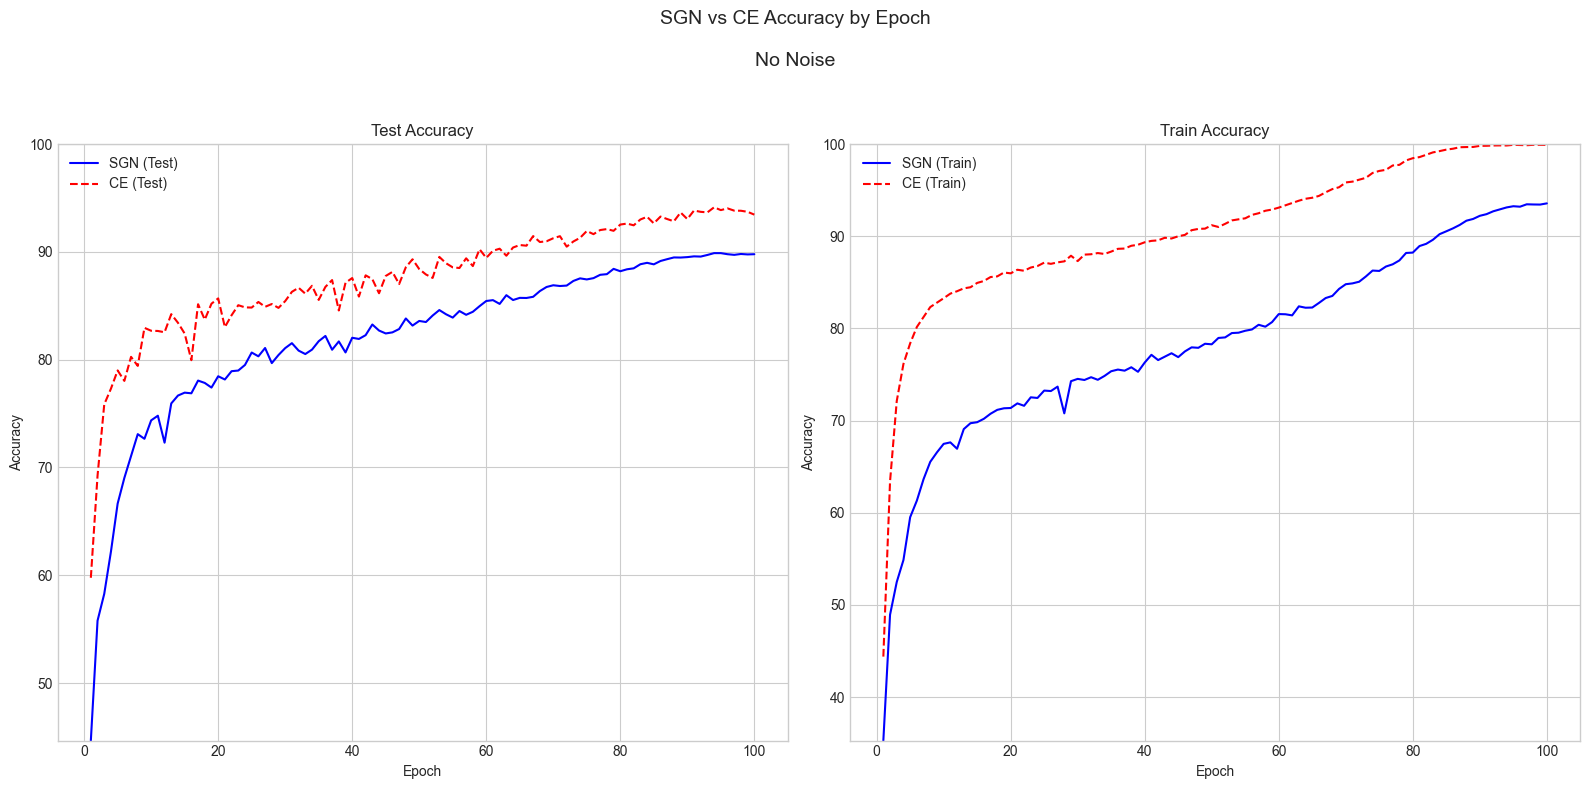

In [88]:
plot_accuracy(
    acc_sgn_test=sgn_test_acc_noise_0,
    acc_ce_test=ce_test_acc_noise_0,
    acc_sgn_train=sgn_train_acc_noise_0,
    acc_ce_train=ce_train_acc_noise_0,
    noise_type=None,
    noise_rate=0.0
)

## Symmetric

### 20% Noise

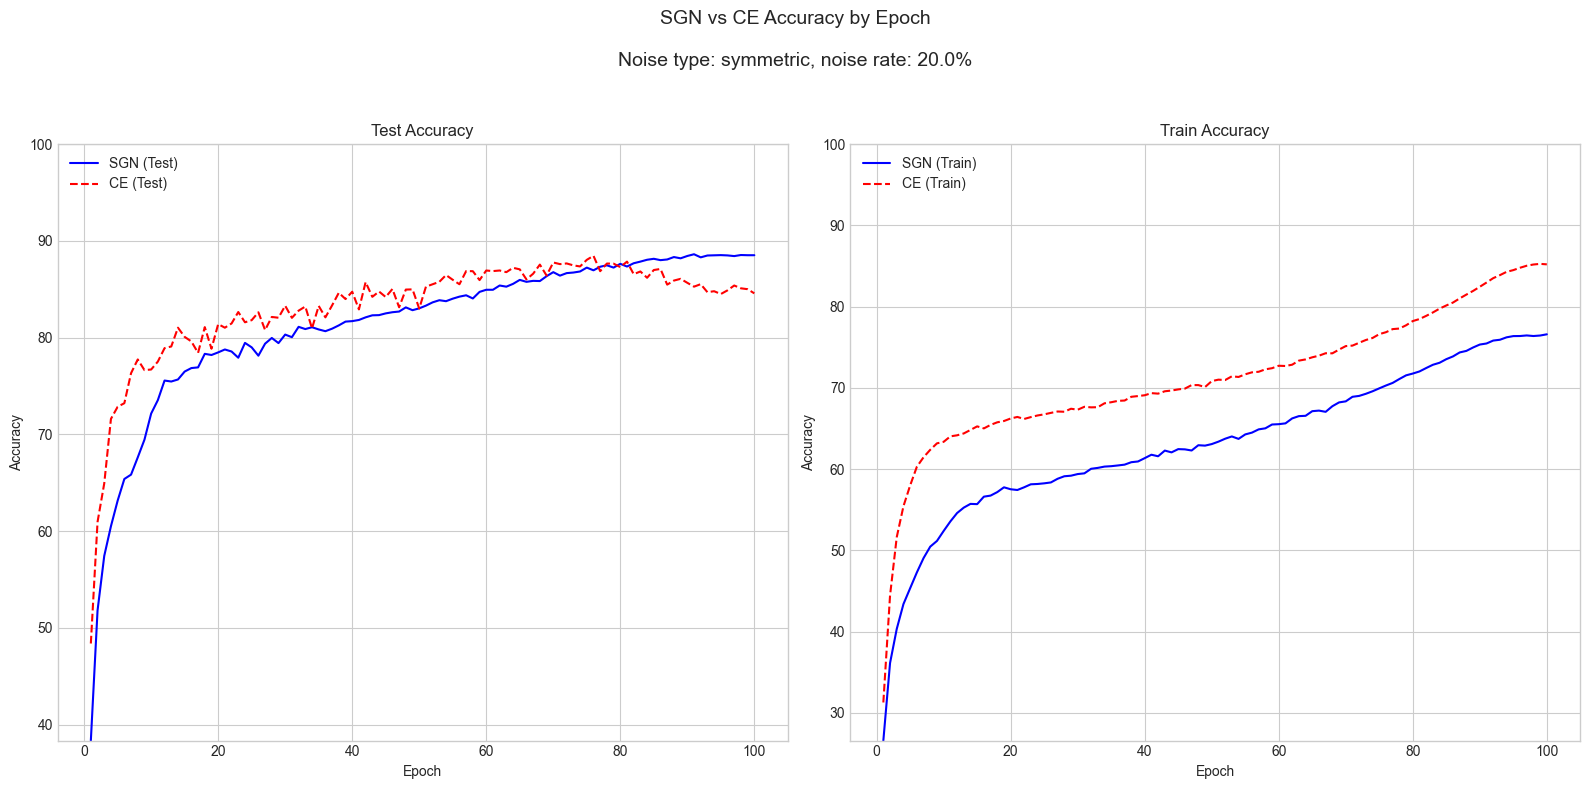

In [89]:
plot_accuracy(
    acc_sgn_test=sgn_test_acc_noise_20,
    acc_ce_test=ce_test_acc_noise_20,
    acc_sgn_train=sgn_train_acc_noise_20,
    acc_ce_train=ce_train_acc_noise_20,
    noise_type='symmetric',
    noise_rate=0.20
)

### 40% Noise

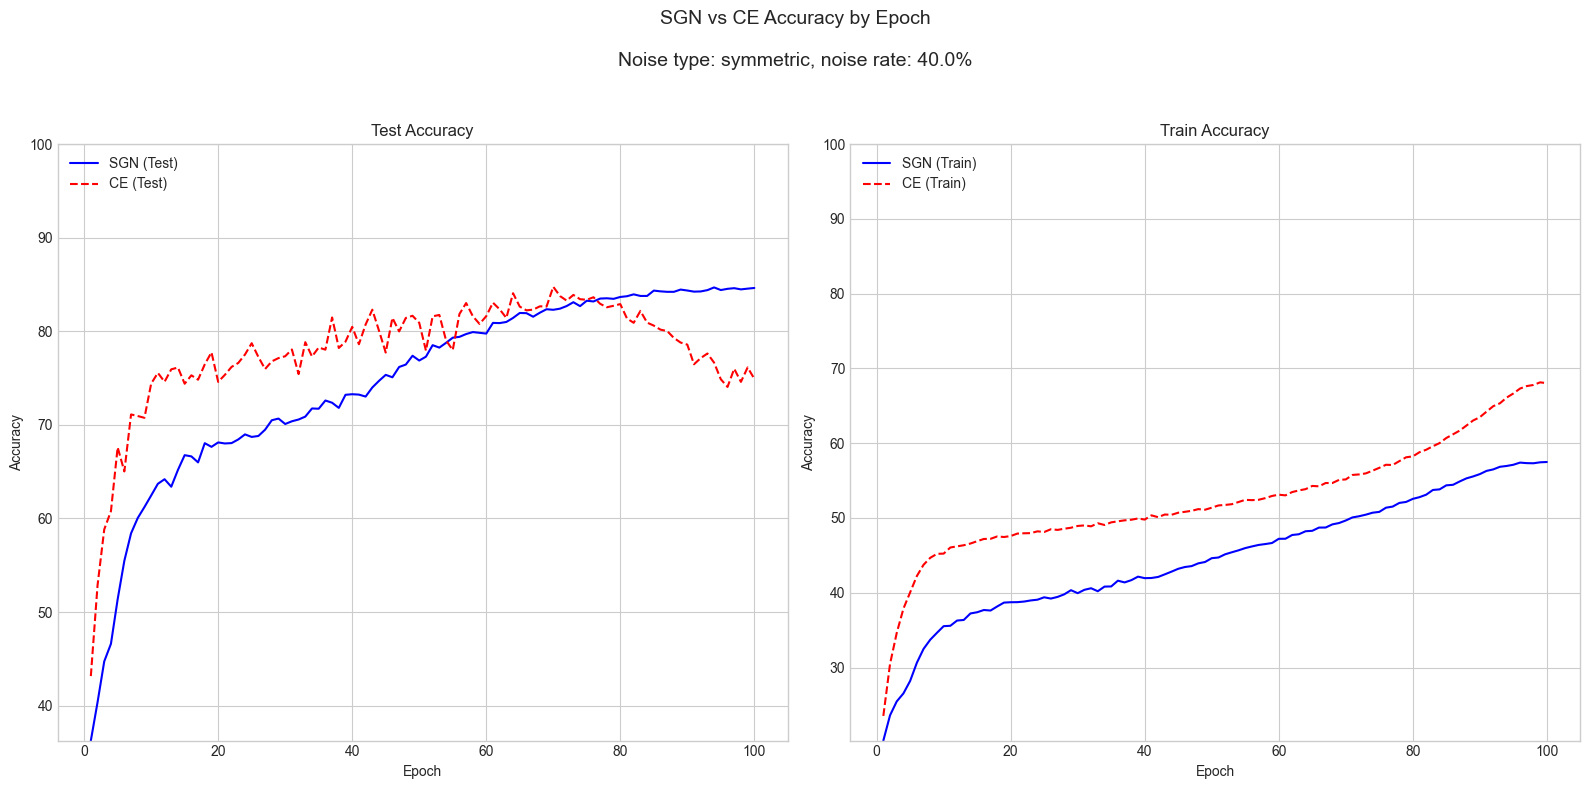

In [90]:
plot_accuracy(
    acc_sgn_test=sgn_test_acc_noise_40,
    acc_ce_test=ce_test_acc_noise_40,
    acc_sgn_train=sgn_train_acc_noise_40,
    acc_ce_train=ce_train_acc_noise_40,
    noise_type='symmetric',
    noise_rate=0.40
)

## Asymmetric

### 20% Noise

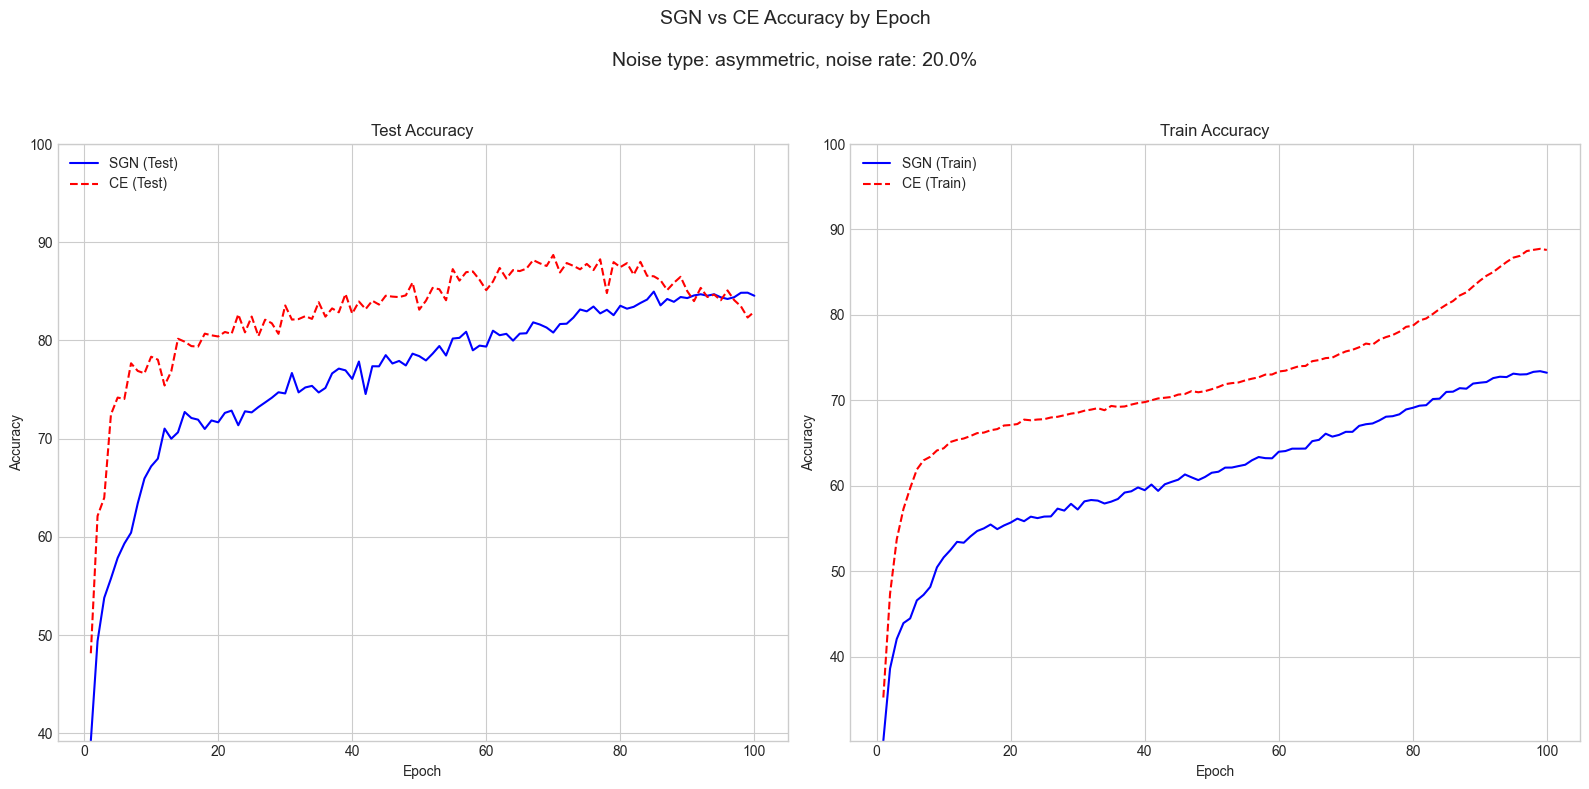

In [91]:
plot_accuracy(
    acc_sgn_test=sgn_test_acc_asymmetric_20,
    acc_ce_test=ce_test_acc_asymmetric_20,
    acc_sgn_train=sgn_train_acc_asymmetric_20,
    acc_ce_train=ce_train_acc_asymmetric_20,
    noise_type='asymmetric',
    noise_rate=0.20
)

### 40% Noise

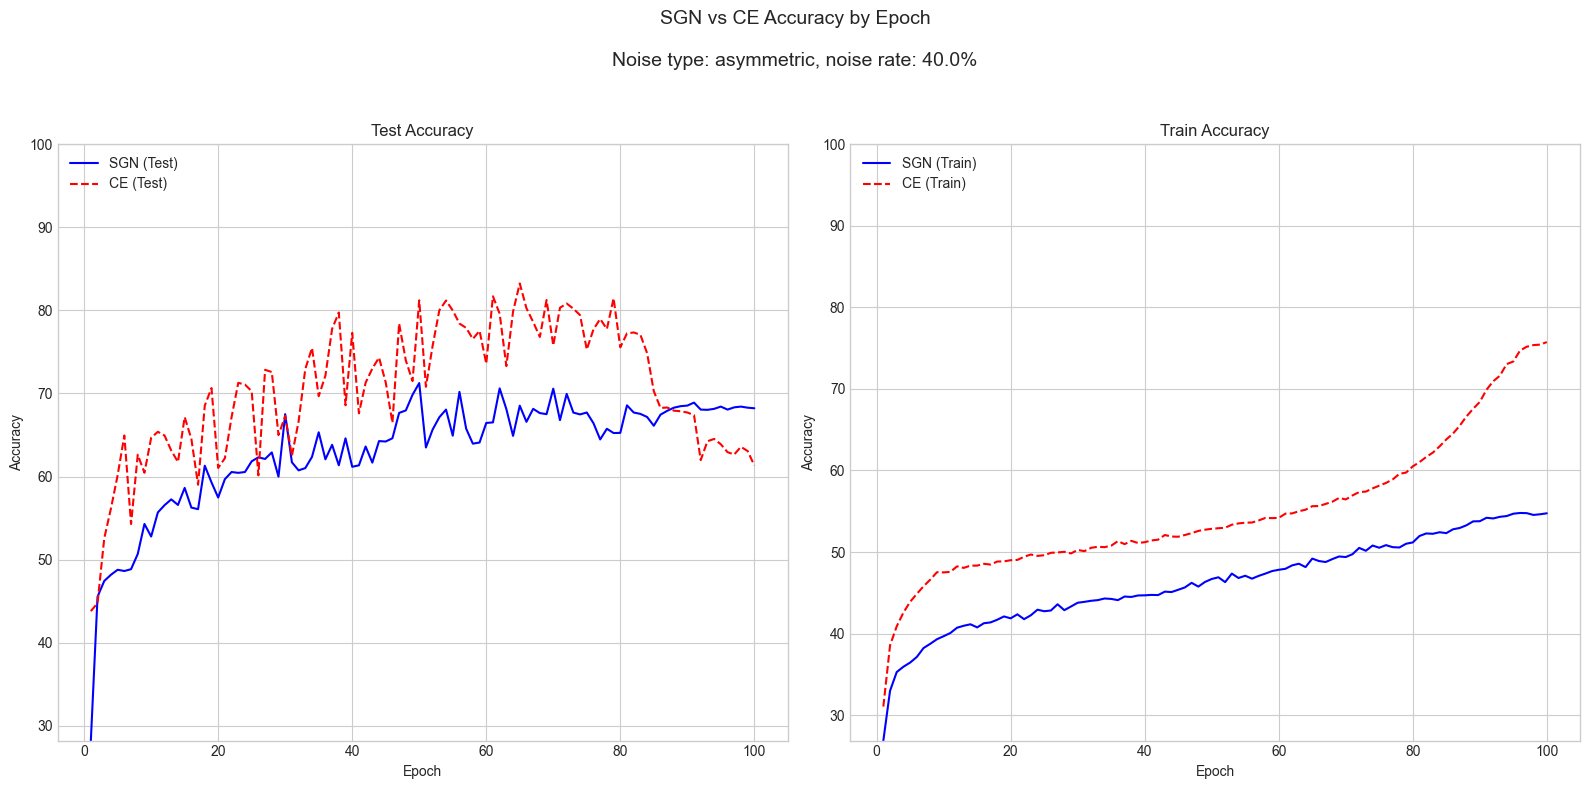

In [92]:
plot_accuracy(
    acc_sgn_test=sgn_test_acc_asymmetric_40,
    acc_ce_test=ce_test_acc_asymmetric_40,
    acc_sgn_train=sgn_train_acc_asymmetric_40,
    acc_ce_train=ce_train_acc_asymmetric_40,
    noise_type='asymmetric',
    noise_rate=0.40
)